
# DA320 Assignment 4: Jupyter Charts
Jon Kaimmer  
DA320  
Winter2022


 ### Introduction
I set out to explore whether 9/11 had an impact in the movies that are being made and released. Especially in the rate of release of superhero type movies.  
How do we begin to answer this question? lets first look at the number of superhero movies that have been released, both before and after 9/11. 


In [711]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json
import pyodbc

import warnings
warnings.filterwarnings('ignore') #Ignore the seaborn warnings...

#This allow me to import my adjacent helpers.ipynb module
#Citation: "https://github.com/ipython/ipynb" {<--There are 4 contributors to this page}

#
#
#import ipynb.fs.full.helpers

import ipynb.fs
from .full.helpers import *

#This allow me to import my adjacent helpers.ipynb module
#
#
#Credentials used to store passwords
credentialLocation = "C:\\Users\\jonat\\OneDrive\\Documents\\GitHub\\DA320\\credentials.json"

# Establish pyodbc bridge to sql servefr
connection = connectToSQLServer(credentialLocation)

# Create cursor object
cursor = connection.cursor()

sns.set(rc = {'figure.figsize':(40,8)})

# Superhero movies

How many superhero movies are being released per year? Does that trend seem to be increasing?

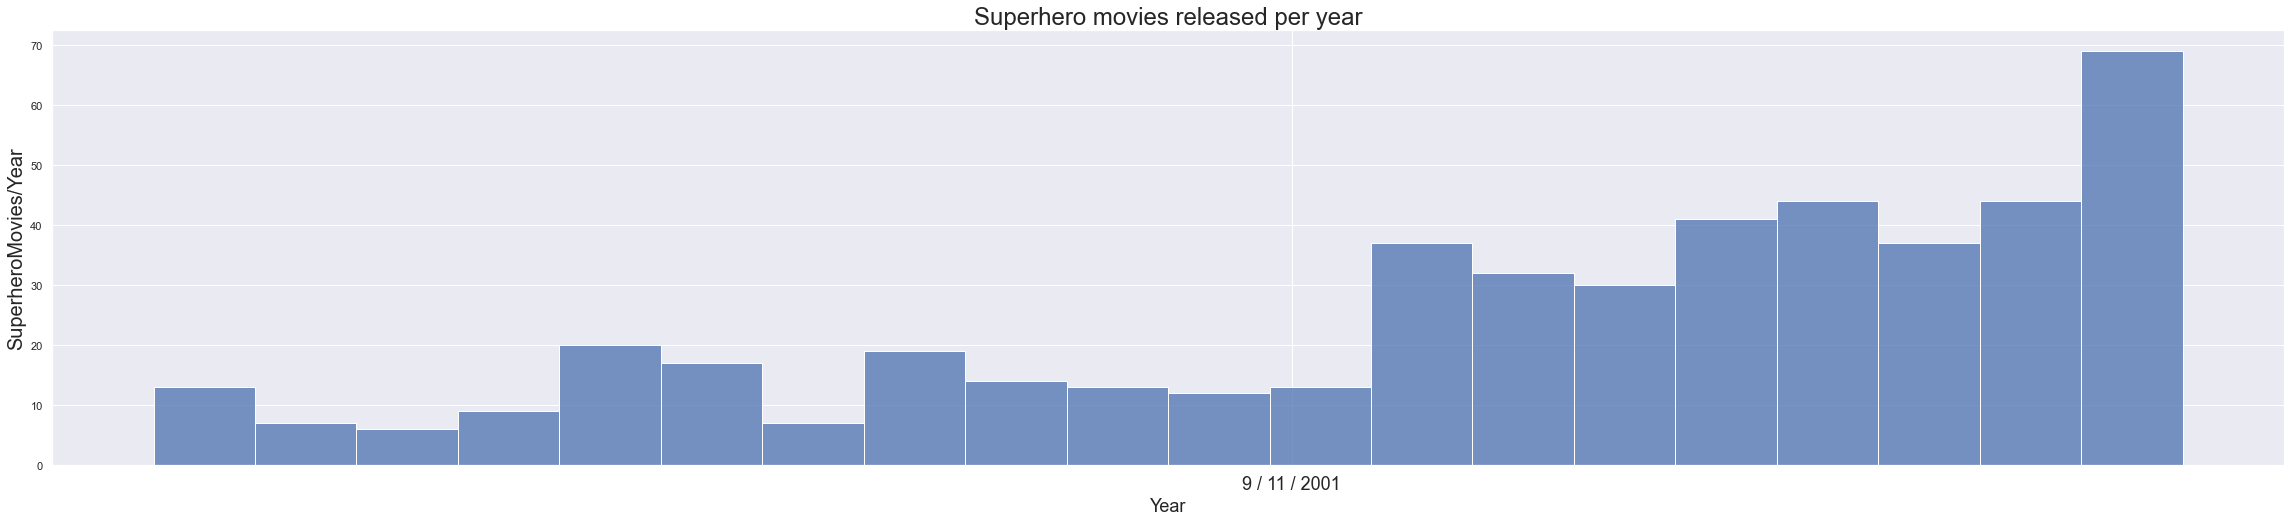

In [712]:
#Pull in Superhero movie data
sql="""SELECT * FROM rawmoviedata"""
superhero_df = pd.read_sql_query(sql, connection)
#superhero_df.head()

p = sns.histplot(
    data=superhero_df, #Designate the pandas dataframe "superhero_df" is the data for this histogram
    x='ReleaseYear', #superhero_df['ReleaseYear'] should be the x axis. 
    bins=20
    )
plt.title('Superhero movies released per year', size= 24)
p.set_xlabel("Year", fontsize = 18)
p.set_ylabel("SuperheroMovies/Year", fontsize = 20)
plt.xticks([2001],['9 / 11 / 2001'], fontsize = 18)
plt.show()

### Superhero movies released per year summary:
This graph shows us that the total number of superhero-type genre movies have increased over time, and that there is a visible swell in the number of them being released since the events of 9/11. This is not evidence of causation, only that from an initial search into the number of superhero movies being released per year, the number of them being released has increased. 
  
This could be comingled with a general trend of more movies OF ALL TYPES being released. If more movies of all types are being released, it would make sense that it would proportionally swell the number of superhero genre movies that were being released.  
Lets see both superhero movie released AND total movie releases on the same graph to compare the two sets of data.  

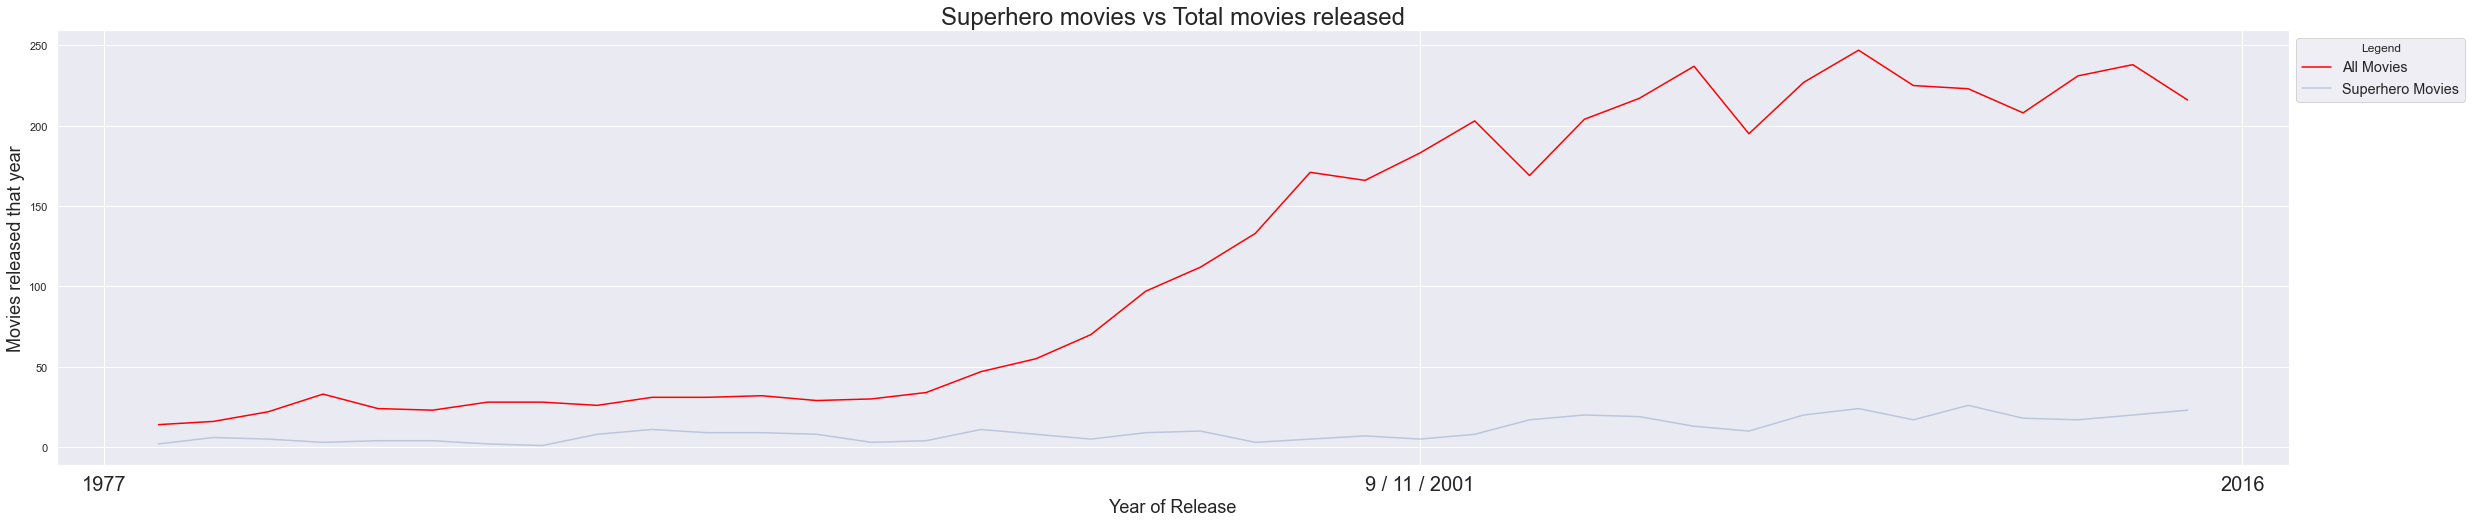

In [713]:
#Total number of movies being release per year
sql="""
SELECT 
    YEAR(Release_Date) AS ReleaseYear,
    COUNT(Release_Date) AS SumOfYear
FROM tmdb_5000_movies
WHERE YEAR(Release_Date) > 1977 AND YEAR(Release_Date) < 2016
GROUP BY 
    YEAR(Release_Date)
ORDER BY
    YEAR(Release_Date)
"""
SumAllmovie_df = pd.read_sql_query(sql, connection)
#Total number of movies being release per year

#Total Superhero movies being released per year
sql="""
SELECT 
    ReleaseYear,
    COUNT(ReleaseYear) AS SumOfYear
FROM rawmoviedata
WHERE ReleaseYear < 2016
GROUP BY 
    ReleaseYear
"""
SumAllSuperhero_df = pd.read_sql_query(sql, connection)
#Total Superhero movies being released per year

plot = sns.lineplot(
    data=SumAllmovie_df,
    x='ReleaseYear',
    y='SumOfYear',
    color='Red'
)
sns.lineplot(
    data=SumAllSuperhero_df,
    x='ReleaseYear',
    y='SumOfYear',
    alpha=0.3
)
plt.xticks([1977,2001,2016],['1977','9 / 11 / 2001','2016'],fontsize = 20)
plt.title('Superhero movies vs Total movies released', size= 24)
plt.xlabel('Year of Release', size= 18)
plt.ylabel('Movies released that year',size= 18)
plt.legend(labels=['All Movies', 'Superhero Movies'], fontsize = 'large', title='Legend', title_fontsize="12",loc = 2, bbox_to_anchor = (1,1))
plt.show()

### Superhero movies vs Total movies released summary:
The incrased rate of production of superhero movies that were released post 9/11 is an almost imperceptable bump in this graph. We see that the movie industry as a whole saw an increased production of movies prior to the events of 9/11 and it would appear that 9/11 had no affect in the total number of movies that were being released. This graph would seem to discount the previous theory that the increase in superhero movies was a rising tide in the entire movie industry and would seem to be a more isolated affect. 

We might be able to look at this data in another way, how did the budget of the movies being made change over time? 

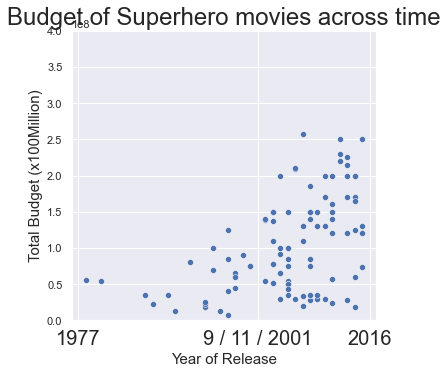

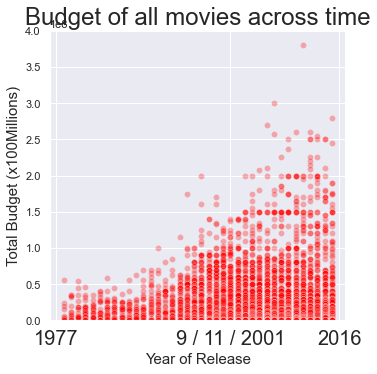

In [741]:
#Find budget of superhero movies
sql="""
SELECT 
    ReleaseYear, Budget, Runtime, Rating, GrossSales
FROM rawmoviedata
WHERE ReleaseYear < 2016 AND GrossSales IS NOT NULL
"""
superheroBudget_df = pd.read_sql_query(sql, connection)
#Total number of movies being release per year

sql="""
SELECT 
    YEAR(Release_Date) AS ReleaseYear,Budget,original_title,Revenue
FROM tmdb_5000_movies
WHERE YEAR(Release_Date) > 1977 AND YEAR(Release_Date) < 2016
"""
allMovieBudget_df = pd.read_sql_query(sql, connection)
#Total number of movies being release per year


sns.relplot(
    data=superheroBudget_df,
    x='ReleaseYear', y='Budget'
)

plt.title('Budget of Superhero movies across time', size= 24)
plt.xlabel('Year of Release', size= 15)
plt.ylabel('Total Budget (x100Million)',size= 15)
plt.ylim((0,400000000))
plt.xticks([1977,2001,2016],['1977','9 / 11 / 2001','2016'],fontsize = 20)
plt.show()

sns.relplot(
    data=allMovieBudget_df,
    x='ReleaseYear', y='Budget',color='red', alpha=0.3
)

plt.title('Budget of all movies across time', size= 24)
plt.xlabel('Year of Release', size= 15)
plt.ylabel('Total Budget (x100Millions)',size= 15)
plt.xticks([1977,2001,2016],['1977','9 / 11 / 2001','2016'],fontsize = 20)
plt.ylim((0,400000000))
plt.show()

### Movie budget summary:
It would seem that the total movie budget of movies has been rising at an ~exponential pace. This could be a function of the inflation of the USD currency. That bias was not accounted for in this dataset. 
Additionally, we see a rise in the gross sales of both sets of movies (Again this effect is comingled with the inflation that was not taken out of this monetary data)

We might be able to look at this data in another way, how did the revenue these movies brought in, change over time?

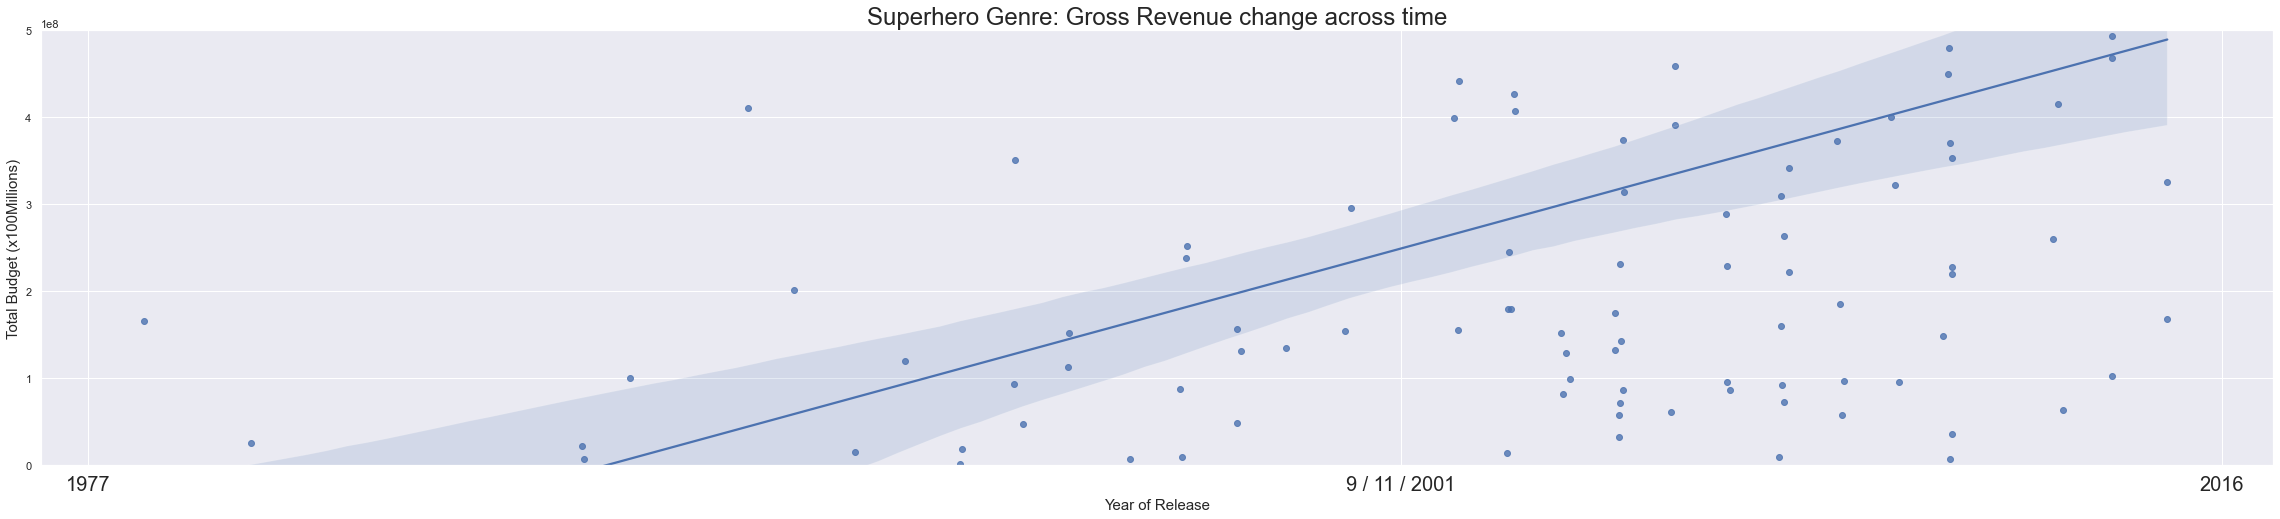

In [753]:
sns.regplot(data=superheroBudget_df, x="ReleaseYear", y="GrossSales", x_jitter=.1)

plt.title('Superhero Genre: Gross Revenue change across time', size= 24)
plt.xlabel('Year of Release', size= 15)
plt.ylabel('Total Budget (x100Millions)',size= 15)
plt.xticks([1977,2001,2016],['1977','9 / 11 / 2001','2016'],fontsize = 20)
plt.ylim((0,500000000))
plt.show()

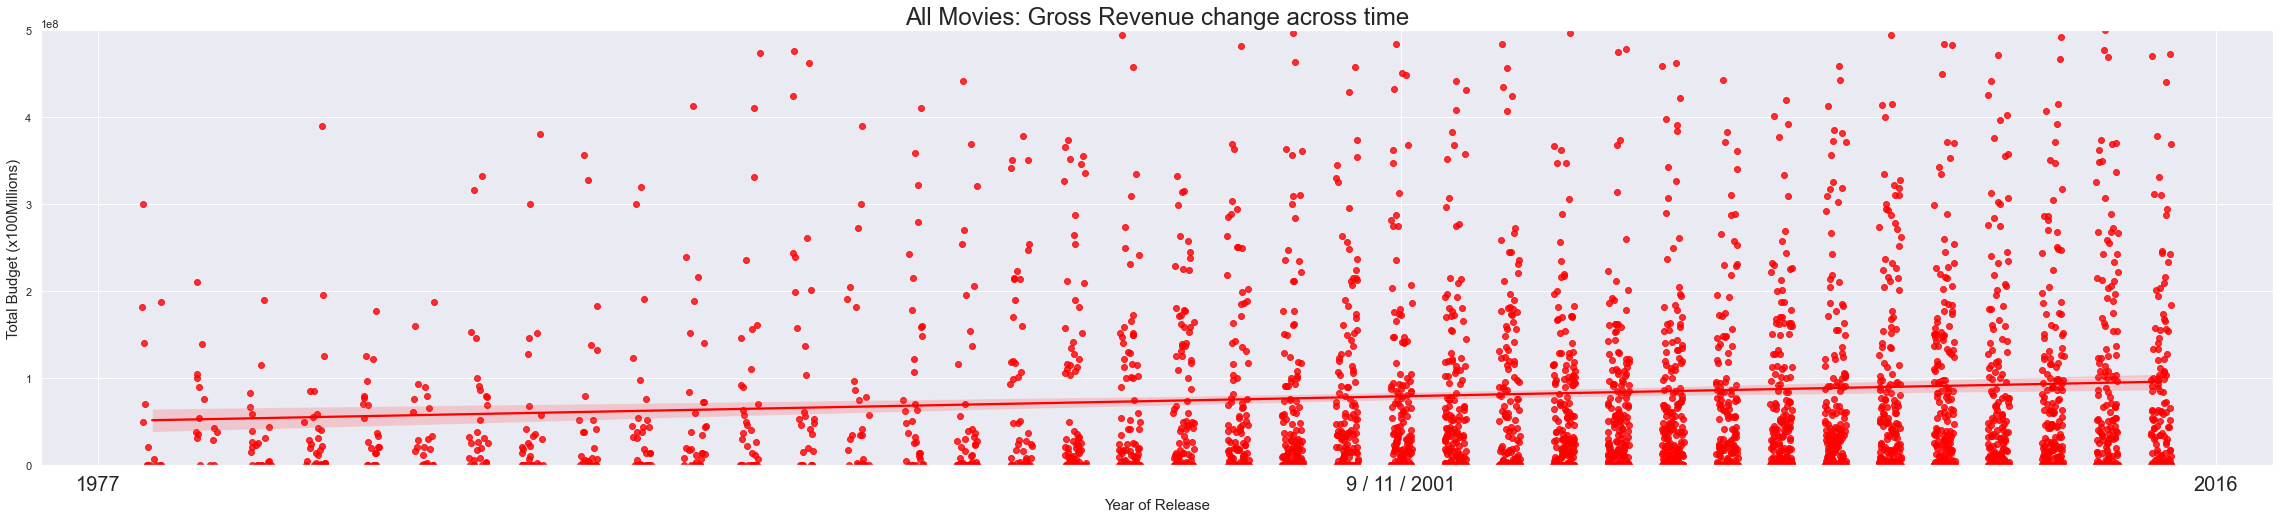

In [754]:
sns.regplot(data=allMovieBudget_df, x="ReleaseYear", y="Revenue", x_jitter=.2, color='red')

plt.title('All Movies: Gross Revenue change across time', size= 24)
plt.xlabel('Year of Release', size= 15)
plt.ylabel('Total Budget (x100Millions)',size= 15)
plt.xticks([1977,2001,2016],['1977','9 / 11 / 2001','2016'],fontsize = 20)
plt.ylim((0,500000000))
plt.show()


### Gross Revenue Summary:
Here, we see an extreme rise in the gross sales of movies in the superhero genre (Again this effect is comingled with the inflation that was not taken out of this monetary data) while not seeing this same drastic rise in the gross sales of all movies. 
There could be reasons for this, that the all movie dataset is holding many "flops" which are bringing the total liner regression of this model down. 

Gross reveneue is a good metric for how popular this or that film was. Essentially, "How many people went and saw the movie in theaters?" can equate to a certain popularity score. Viewing this data from the perspective of gross revenue, we can see that there was a massive increase in the popularity of superhero type movies across time. 

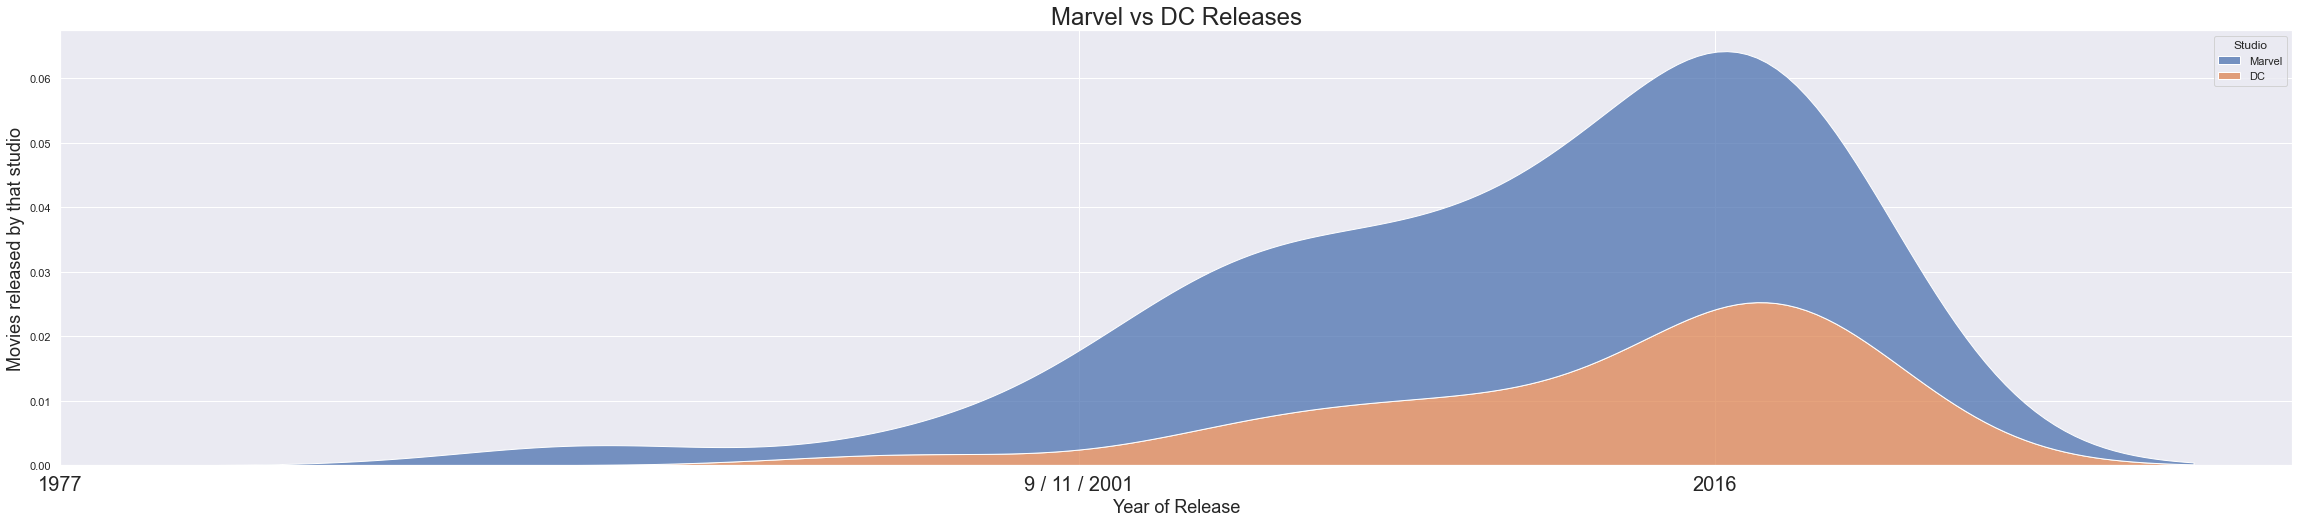

In [755]:
#But who is making these movies? The studios that I know off the top of my head are Marvel and DC(WarnerBros). Lets see their relative contribution to this data?
#
#
# First I need to create a new column where I categorieze movies into 3 buckets {Marvel, DC, Other}. To do this I use a CASE WHEN 
#Look at the Studios making these films

sqlQueryMARVELvDC ="""SELECT Title, ReleaseYear, GrossSales,
CASE 
    WHEN ( 
        Company1 LIKE '%Marvel%' OR 
        Company2 LIKE '%Marvel%' OR
        Company3 LIKE '%Marvel%' OR
        Company4 LIKE '%Marvel%' OR
        Company5 LIKE '%Marvel%') THEN 'Marvel'
    WHEN (
        Company1 LIKE '%DC Comics%' OR Company1 LIKE '%DC Entertainment%' OR 
        Company2 LIKE '%DC Comics%' OR Company2 LIKE '%DC Entertainment%' OR 
        Company3 LIKE '%DC Comics%' OR Company3 LIKE '%DC Entertainment%' OR 
        Company4 LIKE '%DC Comics%' OR Company4 LIKE '%DC Entertainment%' OR 
        Company5 LIKE '%DC Comics%' OR Company5 LIKE '%DC Entertainment%')
        THEN 'DC'
    ELSE NULL
END AS Studio
FROM [dbo].[rawmoviedata];
"""

ALLstudio_df = pd.read_sql_query(sqlQueryMARVELvDC, connection)
#ALLstudio_df.head()
#This only shows MARVEL vs DC
studio_df = pd.read_sql_query(sqlQueryMARVELvDC, connection)
sns.kdeplot(
    data=studio_df,
    x='ReleaseYear',
    hue="Studio",
    multiple="stack"
    )
plt.title('Marvel vs DC Releases', size= 24)
plt.xlabel('Year of Release', size= 18)
plt.ylabel('Movies released by that studio',size= 18)
plt.xticks([1977,2001,2016],['1977','9 / 11 / 2001','2016'],fontsize = 20)
plt.show()

### Marvel vs DC Releases Summary:
While both Marvel and DC studios have increased the number sof movies that they both output per year, Marvel pumped out significantly more movies over time starting in the early 2000's. It would seem that Marvel started increasing the rate that they produced superhero movies before the events of 9/11. 
Additionally, it would seem that the DC studio lagged behind Marvel by several years. 

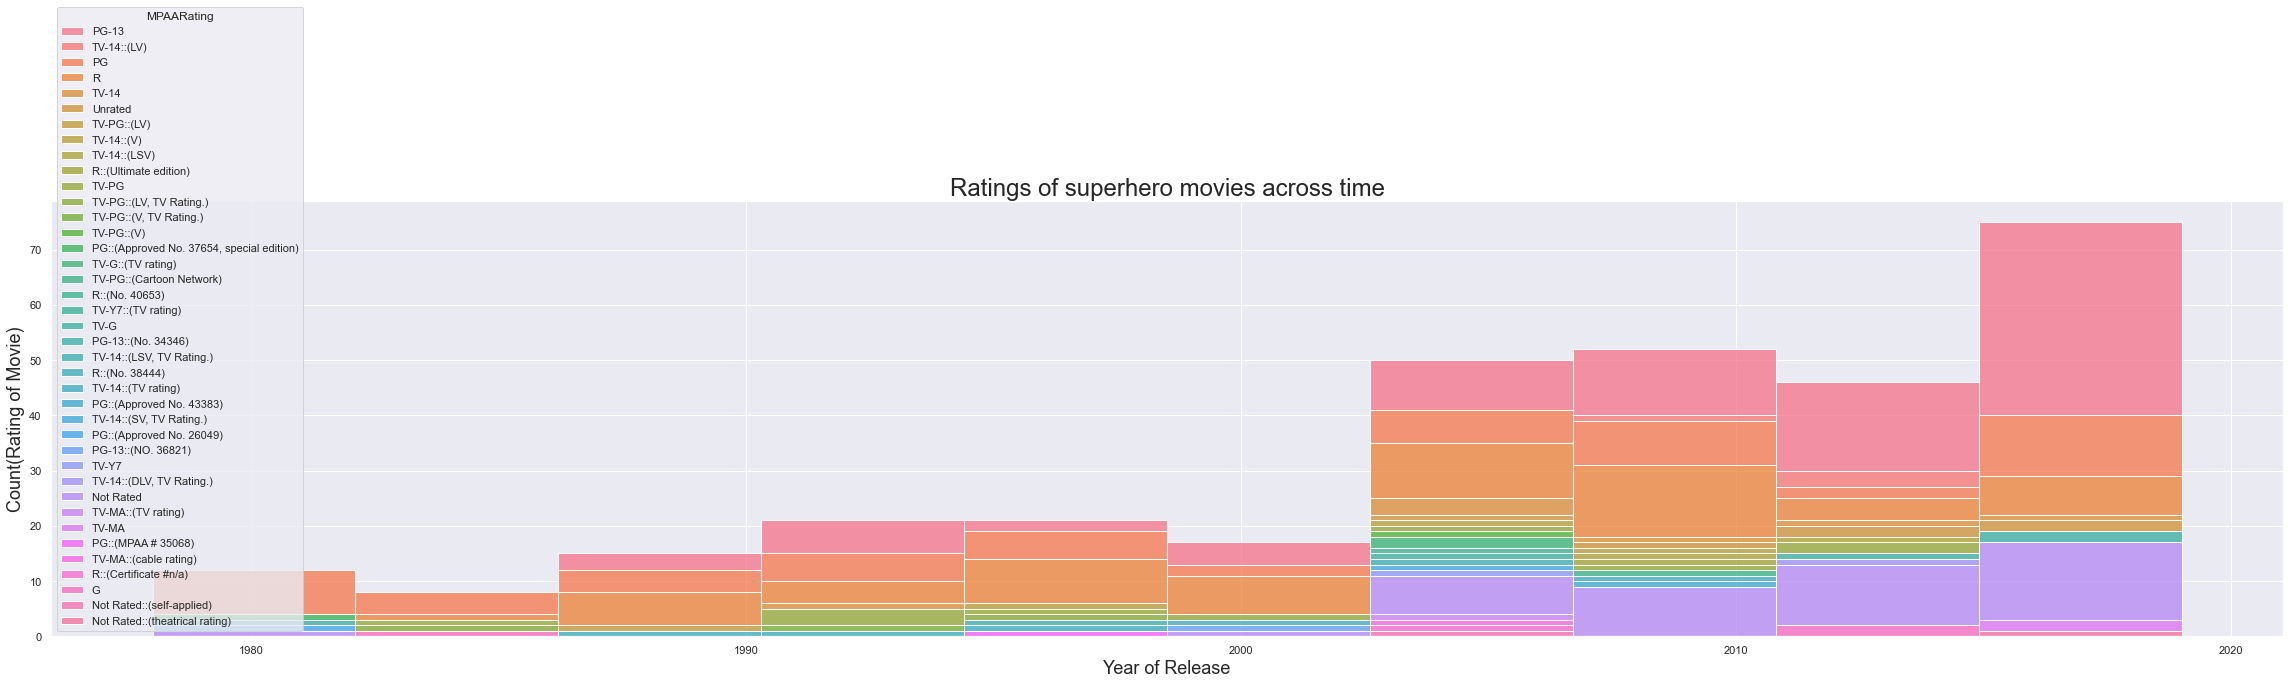

In [716]:
#Change in the ratings of superhero content across time. 
# This chart is unfinished. I wnated it to be sorted into buckets of content (R / TV:MA etc) vs (PG-13 etc) but I was not able to finish this by the assignment date. 

sns.histplot(
    data=superhero_df, #Designate the pandas dataframe "superhero_df" is the data for this histogram
    x='ReleaseYear', #superhero_df['ReleaseYear'] should be the x axis. 
    hue='MPAARating',
    multiple='stack')
plt.title('Ratings of superhero movies across time', size= 24)
plt.xlabel('Year of Release', size= 18)
plt.ylabel('Count(Rating of Movie)',size= 18)
#plt.legend(fontsize = 'large', title='Legend', title_fontsize="12",loc = 2, bbox_to_anchor = (1,1))
plt.show()

### Ratings of superhero movies across time:
This graph did not turn out how I wanted it to. I believe there is good data here that I was not able to adaquetly categorize and so I decided to still include it. 

 ### Conclusion

 I set out to explore the question "9/11 had a impact into every aspect of American life, is that impact discoverable in the type, rate, budget or content rating of movies being released? Especially in superhero movies."

What did I learn?
While all rate of release of all movies have increased over the past 50 years, there was a dramatic increase in the rate of production of superhero movies following the events of 9/11. However, this is not causation. In the graph of Marvel vs. DC releases, we see that Marvel had been increasing their production schedule of superhero movies prior to the events of 9/11 and so the rate of superhero movie production cannot be attributed to 9/11 and the fallout that came from it. 

Additionally, while budgets and gross reveneues have increased across the board for movies across the last 50 years. Our data showed us massive surge in the Gross Revenue (another metric for public popularity) in Superhero Movies post 9/11. Again, this is not causation but merely data points that we help us see the picture more clearly. This affect could have been caused by the investment Marvel and other studios had been pumping into this genre and that were a hidden lagging variable in the data. 

As for future analysis, I believe further analysis could drill into the MPAA ratings chart above and look at the changes in the proportion of mature content vs PG content across time. 